In [28]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [29]:
df1 = pd.read_csv("SP5001.csv")
df2 = pd.read_csv("SP5002.csv")
df3 = pd.read_csv("SP5003.csv")

In [30]:
print("DF1 : ", df1.shape)
print("DF2 : ", df2.shape)
print("DF3 : ", df3.shape)

DF1 :  (15120, 7)
DF2 :  (190, 7)
DF3 :  (119, 7)


In [31]:
df = pd.concat([df1,df2,df3])

C:\Users\Rajiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [49]:
df.shape

(15230, 11)

In [36]:
df.loc[:,"Date"] = df.loc[:,"Date"].astype("datetime64")

In [52]:
df.sort_values("Date", inplace=True)

C:\Users\Rajiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
df.reset_index(drop=True, inplace=True)

In [50]:
df = df.loc[df["Year"] > 1997, :]

In [40]:
df["Year"] = pd.DatetimeIndex(df['Date']).year

In [41]:
df["Month"] = pd.DatetimeIndex(df['Date']).month

In [42]:
df["Log Close"] = np.log(df["Close"])

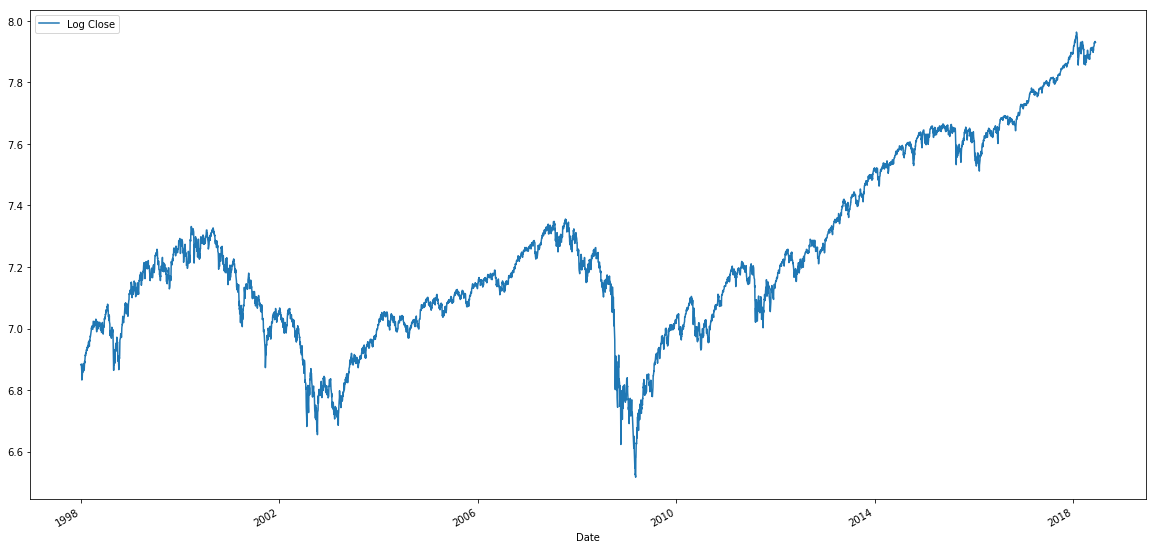

In [56]:
df.plot("Date", "Log Close", figsize=(20,10))

In [43]:
df["200dayma"] = df["Close"].rolling(200).mean()

In [45]:
df.dropna(inplace=True)

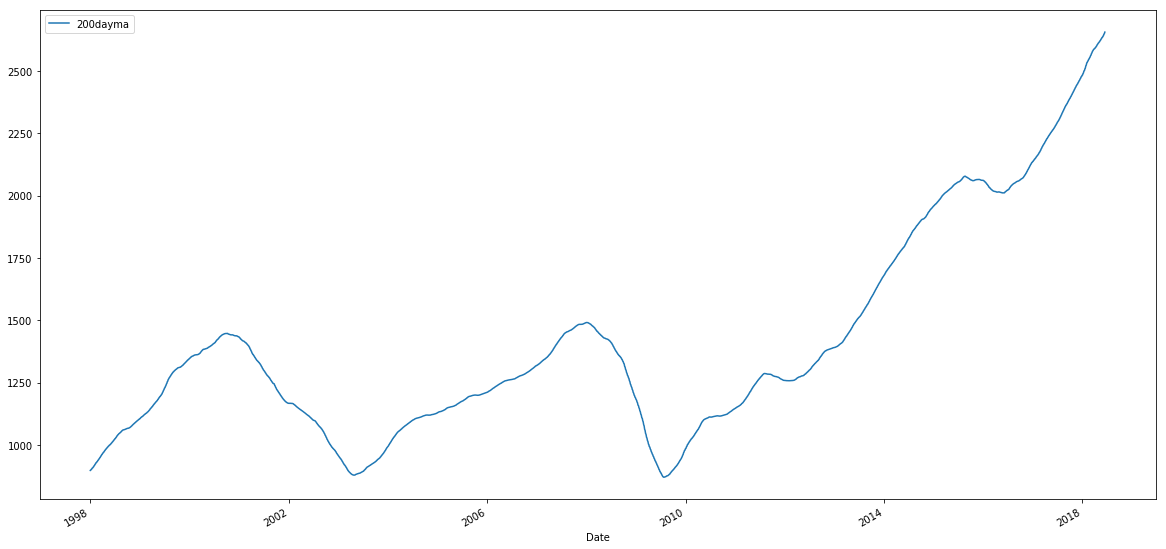

In [55]:
df.plot("Date", "200dayma", figsize=(20,10))

In [57]:
df["Log 200dayma"] = np.log(df["200dayma"])

C:\Users\Rajiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
df.head()

,Adj Close,Close,Date,High,Low,Open,Volume,Year,Month,Log Close,200dayma,Log 200dayma
0,975.039978,975.039978,1998-01-02,975.039978,965.729980,970.429993,366730000,1998,1,6.882478,897.756501,6.799899
1,977.070007,977.070007,1998-01-05,982.630005,969.000000,975.039978,628070000,1998,1,6.884558,898.728601,6.800981
2,966.580017,966.580017,1998-01-06,977.070007,962.679993,977.070007,618360000,1998,1,6.873764,899.641001,6.801996
3,964.000000,964.000000,1998-01-07,966.580017,952.669983,966.580017,667390000,1998,1,6.871091,900.506551,6.802957
4,956.049988,956.049988,1998-01-08,964.000000,955.039978,964.000000,652140000,1998,1,6.862810,901.341451,6.803884


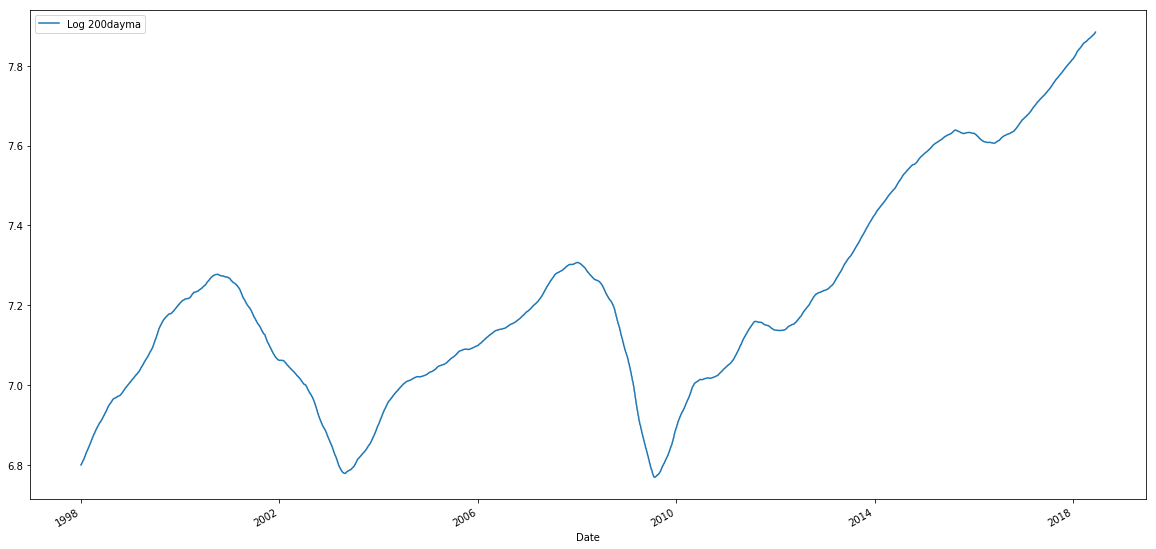

In [60]:
df.plot("Date", "Log 200dayma", figsize=(20,10))

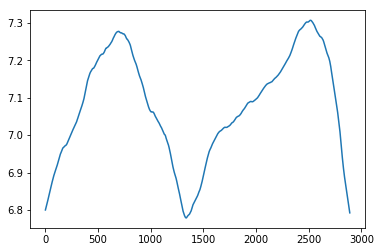

In [100]:
data = df.loc[((df["Year"] < 2009) | ((df["Year"] < 2010) & (df["Month"] < 7))),"Log 200dayma"].values

plt.plot(data)

In [106]:
x = np.arange(0,len(data))
y = data

In [116]:
def fit_curve(x, y, deg):
    coefficients = np.polyfit(x, y, deg)
    polynomial = np.poly1d(coefficients)
    ys = polynomial(x)
    return ys

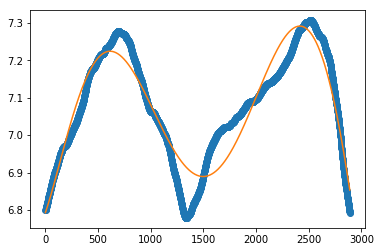

In [129]:
plt.plot(x, y, 'o', x, fit_curve(x, y, 6), '-')

In [120]:
from sklearn.metrics import mean_squared_error

In [125]:
for i in range(1,10):
    print("For {} degree Polynomial Mean Squared Error is : {}".format(i, mean_squared_error(y, fit_curve(x, y, i))))

For 1 degree Polynomial Mean Squared Error is : 0.020107890774049283
For 2 degree Polynomial Mean Squared Error is : 0.019802900721877098
For 3 degree Polynomial Mean Squared Error is : 0.01948576036582784
For 4 degree Polynomial Mean Squared Error is : 0.0036021452314328483
For 5 degree Polynomial Mean Squared Error is : 0.00313883384456766
For 6 degree Polynomial Mean Squared Error is : 0.0026183318935667226
For 7 degree Polynomial Mean Squared Error is : 0.0014876991389808677
For 8 degree Polynomial Mean Squared Error is : 0.0012522333591466614
For 9 degree Polynomial Mean Squared Error is : 0.0005583435459746586
